In [32]:
import os
import numpy as np
import os.path as osp
from glob import glob
from tqdm import tqdm

import cv2
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [33]:
data_dir = '../input/cat/'
data_save_dir = '../input/'
# data_dir = '../../tennis_ai/input/coco/train2014'
# data_save_dir = '../data/img_align_celeba_subset/'

In [34]:
image_paths = glob(osp.join(data_dir, '*'))
image_paths.sort()
image_path = image_paths[0]

In [35]:
train_paths, test_paths = train_test_split(image_paths, test_size=100, random_state=0)
# image_paths, valid_paths = train_test_split(image_paths, test_size=2000, random_state=0)
# image_paths, test_paths = train_test_split(image_paths, test_size=97, random_state=0)

In [36]:
len(train_paths)

9897

In [37]:
len(test_paths)

100

In [55]:
crop_size = (128, 128)

In [79]:
def random_crop(image, crop_size, random_seed=0):
    np.random.seed(random_seed)
    h, w, _ = image.shape

    top = np.random.randint(0, h - crop_size[0])
    left = np.random.randint(0, w - crop_size[1])

    bottom = top + crop_size[0]
    right = left + crop_size[1]

    image = image[top:bottom, left:right, :]
    return image

In [80]:
image = cv2.imread(image_path)

In [81]:
np.random.seed(0)

In [82]:
img_crp = random_crop(image, crop_size)

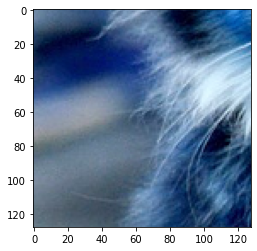

In [83]:
plt.imshow(img_crp)

In [40]:
org_height = 218

In [41]:
width = 160

In [42]:
height = 160

In [43]:
org_width = 178
org_height = 218
height_top = int((org_height - height) / 2)
height_bottom = int((org_height + height) / 2)
height_bottom - height_top

160

In [44]:
def split_save(image_paths, data_type):
    shapes = []
    for image_path in tqdm(image_paths):
        image_name = osp.basename(image_path)
        image = cv2.imread(image_path)
        image_rsz = random_crop(image, crop_size)
        image_save_path = osp.join(data_save_dir, 'cat_{}'.format(data_type), image_name)
        os.makedirs(osp.dirname(image_save_path), exist_ok=True)
        cv2.imwrite(image_save_path, image_rsz)

In [46]:
split_save(train_paths, 'train')
# split_save(valid_paths, 'valid')
split_save(test_paths, 'test')

 34%|███▍      | 3351/9897 [00:19<00:37, 173.21it/s]


KeyboardInterrupt: 

In [38]:
def split_save(image_paths, data_type):
    shapes = []
    for image_path in tqdm(image_paths):
        image_name = osp.basename(image_path)
        image = cv2.imread(image_path)
        image_save_path = osp.join(data_save_dir, 'img_align_celeba', data_type, image_name)
        os.makedirs(osp.dirname(image_save_path), exist_ok=True)
        cv2.imwrite(image_save_path, image)